# Regan Nguyen

### Due to the progression of health science, NBA players have gotten stronger, faster, more accurate and more athletic in general. How has that affected scoring in the NBA?  

How I plan on doing this is by looking at the top 10 leading scorers of each year and then comparing them to see the difference between points scored. To clean up the data, I would take columns I would not need such as AST (Assist per game), BLK (Blocks per game), STL (Steals per game), TRB (total rebound percentage), and more. I would also order it by years to see the data more clearly and see any anomalies if there are any.






In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from project_functions3 import load_and_process



## Milestone 2

#### Load Datasets

In [25]:
pd.read_csv("../data/raw/archive (2)/mvps.csv")

,Unnamed: 0,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,year
0,0,1,Michael Jordan,27,CHI,77.0,891.0,960,0.928,82,...,6.0,5.5,2.7,1.0,0.539,0.312,0.851,20.3,0.321,1991
1,1,2,Magic Johnson,31,LAL,10.0,497.0,960,0.518,79,...,7.0,12.5,1.3,0.2,0.477,0.320,0.906,15.4,0.251,1991
2,2,3,David Robinson,25,SAS,6.0,476.0,960,0.496,82,...,13.0,2.5,1.5,3.9,0.552,0.143,0.762,17.0,0.264,1991
3,3,4,Charles Barkley,27,PHI,2.0,222.0,960,0.231,67,...,10.1,4.2,1.6,0.5,0.570,0.284,0.722,13.4,0.258,1991
4,4,5,Karl Malone,27,UTA,0.0,142.0,960,0.148,82,...,11.8,3.3,1.1,1.0,0.527,0.286,0.770,15.5,0.225,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,10,11,Russell Westbrook,32,WAS,0.0,5.0,1010,0.005,65,...,11.5,11.7,1.4,0.4,0.439,0.315,0.656,3.7,0.075,2021
470,11,12,Ben Simmons,24,PHI,0.0,3.0,1010,0.003,58,...,7.2,6.9,1.6,0.6,0.557,0.300,0.613,6.0,0.153,2021
471,12,13T,James Harden,31,TOT,0.0,1.0,1010,0.001,44,...,7.9,10.8,1.2,0.8,0.466,0.362,0.861,7.0,0.208,2021
472,13,13T,LeBron James,36,LAL,0.0,1.0,1010,0.001,45,...,7.7,7.8,1.1,0.6,0.513,0.365,0.698,5.6,0.179,2021


In [26]:
pd.read_csv("../data/raw/archive (2)/player.csv")

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,0,1,Precious Achiuwa,PF,21,MIA,61,4,12.1,2.0,...,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0,1991
1,1,2,Jaylen Adams,PG,24,MIL,7,0,2.6,0.1,...,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3,1991
2,2,3,Steven Adams,C,27,NOP,58,58,27.7,3.3,...,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6,1991
3,3,4,Bam Adebayo,C,23,MIA,64,64,33.5,7.1,...,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7,1991
4,4,5,LaMarcus Aldridge,C,35,TOT,26,23,25.9,5.4,...,0.7,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22625,725,536,Delon Wright,PG,28,SAC,27,8,25.8,3.9,...,1.0,2.9,3.9,3.6,1.6,0.4,1.3,1.1,10.0,2021
22626,726,537,Thaddeus Young,PF,32,CHI,68,23,24.3,5.4,...,2.5,3.8,6.2,4.3,1.1,0.6,2.0,2.2,12.1,2021
22627,727,538,Trae Young,PG,22,ATL,63,63,33.7,7.7,...,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3,2021
22628,728,539,Cody Zeller,C,28,CHO,48,21,20.9,3.8,...,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4,2021


In [27]:
pd.read_csv("../data/raw/archive (2)/teams.csv")


,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,Northwest Division,Northwest Division,Northwest Division,Northwest Division,Northwest Division,Northwest Division,Northwest Division,2021,Northwest Division
1,1,52,20,.722,—,116.4,107.2,8.97,2021,Utah Jazz*
2,2,47,25,.653,5.0,115.1,110.1,4.82,2021,Denver Nuggets*
3,3,42,30,.583,10.0,116.1,114.3,1.81,2021,Portland Trail Blazers*
4,4,23,49,.319,29.0,112.1,117.7,-5.25,2021,Minnesota Timberwolves
5,5,22,50,.306,30.0,105.0,115.6,-10.13,2021,Oklahoma City Thunder
6,6,Pacific Division,Pacific Division,Pacific Division,Pacific Division,Pacific Division,Pacific Division,Pacific Division,2021,Pacific Division
7,7,51,21,.708,—,115.3,109.5,5.67,2021,Phoenix Suns*
8,8,47,25,.653,4.0,114.0,107.8,6.02,2021,Los Angeles Clippers*
9,9,42,30,.583,9.0,109.5,106.8,2.77,2021,Los Angeles Lakers*


In [28]:

allSeason = pd.read_csv("../data/raw/archive (2)/all_seasons.csv")
allSeason.info()
allSeason.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12305 entries, 0 to 12304
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         12305 non-null  int64  
 1   player_name        12305 non-null  object 
 2   team_abbreviation  12305 non-null  object 
 3   age                12305 non-null  float64
 4   player_height      12305 non-null  float64
 5   player_weight      12305 non-null  float64
 6   college            12305 non-null  object 
 7   country            12305 non-null  object 
 8   draft_year         12305 non-null  object 
 9   draft_round        12305 non-null  object 
 10  draft_number       12305 non-null  object 
 11  gp                 12305 non-null  int64  
 12  pts                12305 non-null  float64
 13  reb                12305 non-null  float64
 14  ast                12305 non-null  float64
 15  net_rating         12305 non-null  float64
 16  oreb_pct           123

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


## Milestone 3

#### Cleaning Datasets 

In [29]:
df1= pd.read_csv("../data/raw/archive (2)/all_seasons.csv")
df1.groupby('season').apply(lambda x: x.nlargest(10, 'pts').mean(numeric_only=True)).reset_index()[['season', 'pts']] 


,season,pts
0,1996-97,25.11
1,1997-98,24.15
2,1998-99,22.87
3,1999-00,25.35
4,2000-01,27.37
5,2001-02,25.65
6,2002-03,26.00
7,2003-04,24.05
8,2004-05,26.22
9,2005-06,28.67


### EDA

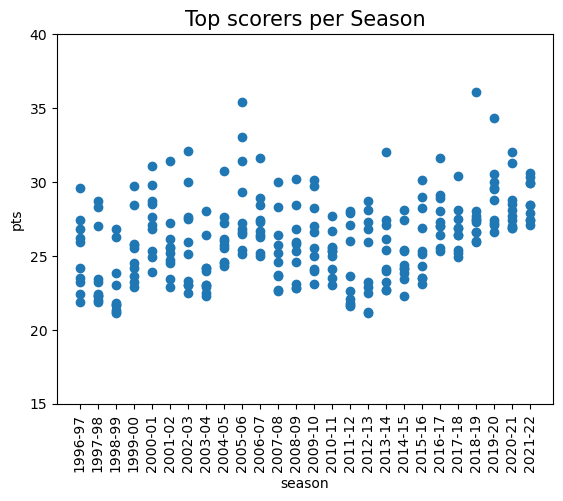

In [30]:
top10 = allSeason.groupby('season').apply(lambda x: x.nlargest(10, 'pts')).reset_index(drop=True)
fig, ax = plt.subplots()
ax.scatter(top10['season'], top10['pts'])
ax.set_xlabel('season')
ax.set_ylabel('pts')
ax.set_title('Top scorers per Season')
ax.title.set_size(15)

ax.set_xticks(range(len(top10['season'].unique())))
ax.set_xticklabels(top10['season'].unique(), rotation=90)
ax.set_yticks([15, 20, 25, 30, 35, 40])
plt.show()

#### Observations

* You can see two dots that near 40 pts in 2004 and 2017 which bring up the average for those year a lot  

* You can see from the 2012-2013 season and on, the lowest pts from the top 10 scorers of each season start to increase in a linear line, thus having the average going up

* In the newer seasons, the dots seem to be closer with one another then the ealier years. thsu players are scoring closer to each other then before

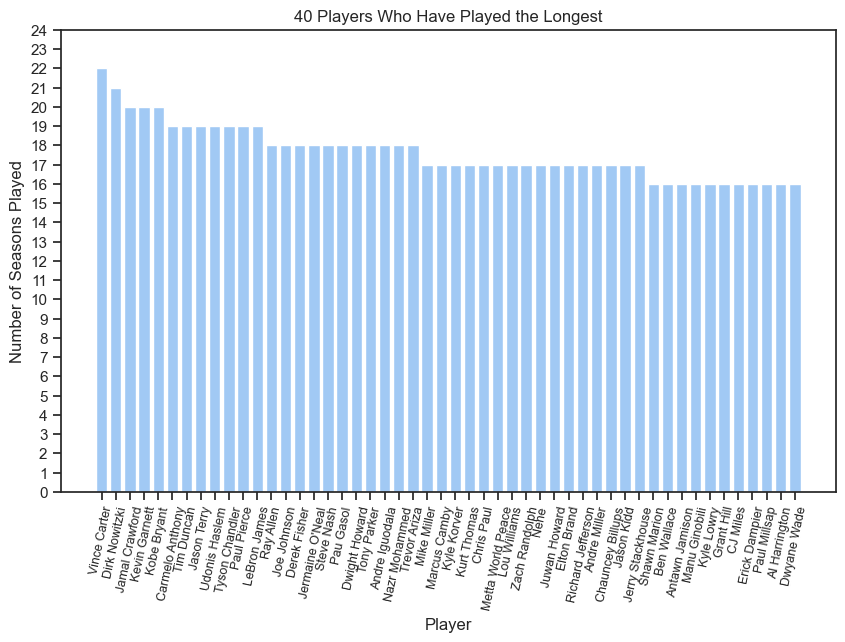

In [52]:
allSeason = pd.read_csv("../data/raw/archive (2)/all_seasons.csv")
seasons_played = allSeason.groupby('player_name')['season'].nunique().reset_index()
seasons_played = seasons_played.sort_values('season', ascending=False).head(50)
plt.figure(figsize=(10,6))
plt.bar(seasons_played['player_name'], seasons_played['season'],)
plt.xlabel('Player')
plt.ylabel('Number of Seasons Played')
plt.title('40 Players Who Have Played the Longest')
plt.xticks(rotation=78)
plt.xticks(fontsize=9)
plt.yticks(range(0,25,1))
plt.show()








### Observation

* Vince carters has the most season played in the nba ever, to play a sport of the highest level for over 2 decades is impressive 
 
* Other then 2 people, no one else in the nba has made it over 20 season. 

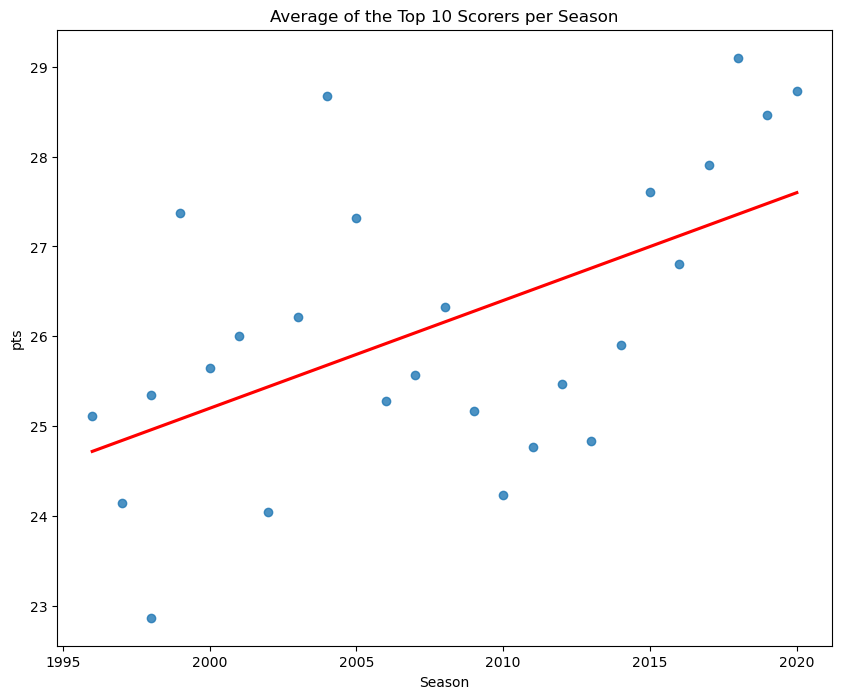

In [32]:



from project_functions3 import load_and_process
sys.path.append("code")
dfs = load_and_process("../data/raw/archive (2)/all_seasons.csv")
fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlabel('Season')
ax.set_ylabel('Average Points per Game')
ax.set_title('Average of the Top 10 Scorers per Season')
sns.regplot(x= [1996, 1997, 1998, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,2007,2008,2009,2010,2011,2012,2013,2014,2015, 2016,2017,2018,2019,2020,]  , y= dfs['pts'] , ci=False, line_kws={'color':'red'})
fig.savefig("EDA graph3")

plt.show()

### Summmary 
this is a a scatterplot graph with the x value being the seasons while y value being the average of the top ten best scorers average of each season. the graph also has a trend line to see the trajectory of the plotted points.

### Observation 
* The plotted points are all within 10 points from each other. 

* the trajectory of the trend line it facing the top right corner of the graph indicating that as the time passes, the more average points the the player score.

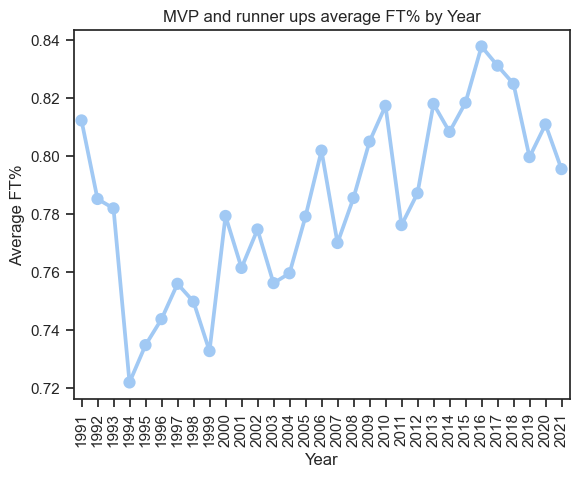

<Figure size 1500x600 with 0 Axes>

In [54]:
df = pd.read_csv("../data/raw/archive (2)/mvps.csv")

## Group the data by year and calculate the average of FT% for each year
avg_ft_by_year = df.groupby('year')['FT%'].mean().reset_index()

# Create a Seaborn point plot
sns.pointplot(x='year', y='FT%', data=avg_ft_by_year)

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Average FT%')
plt.title('MVP and runner ups average FT% by Year')
plt.xticks(rotation=90)
plt.figure(figsize=(15,6))



# Show the plot
plt.show()

### Observation

- the FT% for 1994 was the lowest value with 72%.

- Huge down trajectory on the graph from 1991-1994

- from 1999 -2016 seem to have a rising slope. 








## Milestone 4

In [34]:

sys.path.append("code")
dfs = load_and_process("../data/raw/archive (2)/all_seasons.csv")
print(dfs)





     season    pts
0   1996-97  25.11
1   1997-98  24.15
2   1998-99  22.87
3   1999-00  25.35
4   2000-01  27.37
5   2001-02  25.65
6   2002-03  26.00
7   2003-04  24.05
8   2004-05  26.22
9   2005-06  28.67
10  2006-07  27.32
11  2007-08  25.28
12  2008-09  25.57
13  2009-10  26.33
14  2010-11  25.17
15  2011-12  24.24
16  2012-13  24.77
17  2013-14  25.47
18  2014-15  24.84
19  2015-16  25.90
20  2016-17  27.61
21  2017-18  26.81
22  2018-19  27.91
23  2019-20  29.10
24  2020-21  28.46
25  2021-22  28.73


#### Graph #1

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

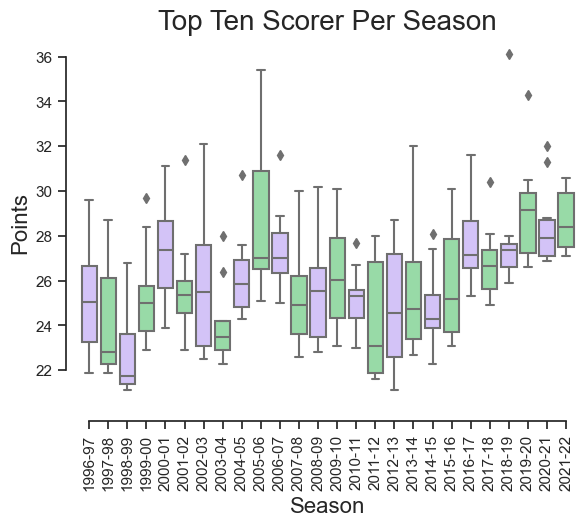

In [35]:
import seaborn as sns
top10 = allSeason.groupby('season').apply(lambda x: x.nlargest(10, 'pts')).reset_index(drop=True)
sns.set_theme(style="ticks", palette="pastel")


ax = sns.boxplot(x="season", y="pts",
            palette=["m", "g"],
            data= top10,)
sns.despine(offset=10, trim=True)
ax.set_xlabel('Season', fontsize=16)
ax.set_ylabel('Points', fontsize=16)
ax.set_title('Top Ten Scorer Per Season', fontsize=20)
plt.xticks(rotation = 90)




### Summary
 this is a box plot that plots the top ten best scorers average, of each season. Using this graph. We are using box plot becuase you can get high level information such as first quartile, median, third quartile, outliers, and maximum values just at a glace.

 ### Observations

- The season 2018-2019 has the biggest outlier with one player averaging 36 pts

- The 2019-2020 season has the largest median out of all season with a median of 29 pts.

- The max point that is not an outlier would be in the 2005-2006 season with 35 pts 


#### Graph #2

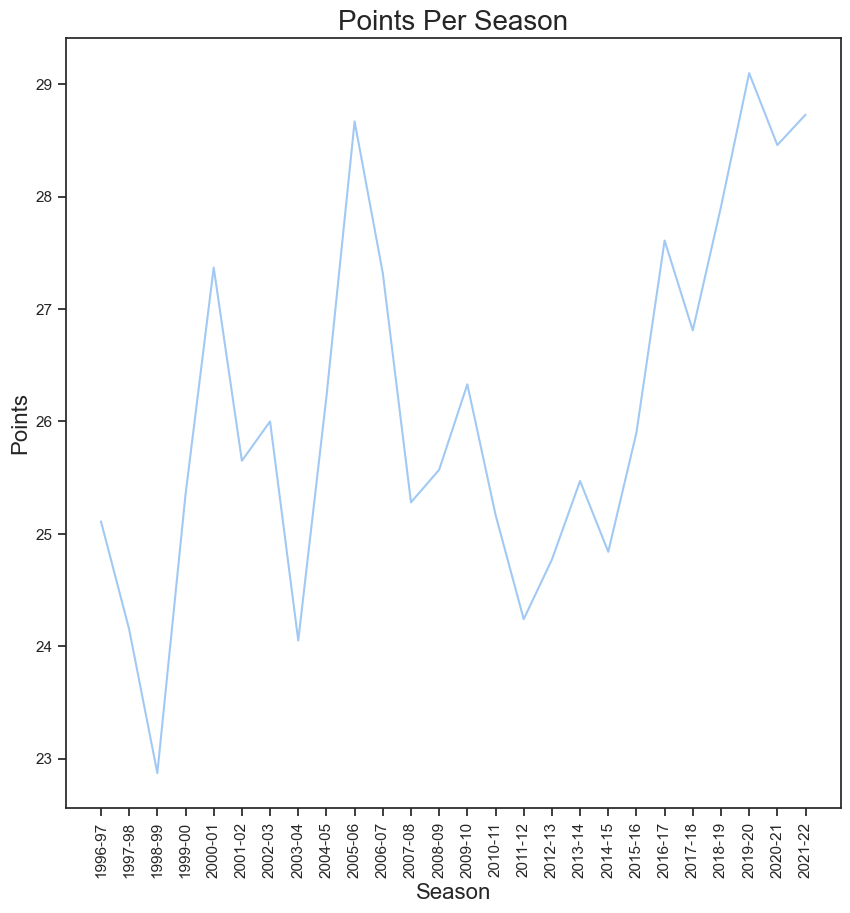

In [36]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(dfs['season'], dfs['pts'])
ax.set_xlabel('Season', fontsize=16)
ax.set_ylabel('Points', fontsize=16)
ax.set_title('Points Per Season', fontsize=20)
plt.xticks(rotation=90)
plt.show()

fig.savefig("graph2")


### Summary
This is a line plot of the average of the top ten best scorers average of each season from 1996-2022, using this graph we can easier compare each seasons  average of the line graph connects to one another. 


### Observations
* Can see the bigger difference between each season which is good because even one point is a big difference between one another

* 2005-2006 and 2019-2020 were the peaks of the graph, which is 14 years between each other. Big age difference but not huge pts difference

* 1998-1999 was the lowest average pts by a whole point 


#### Graph #3

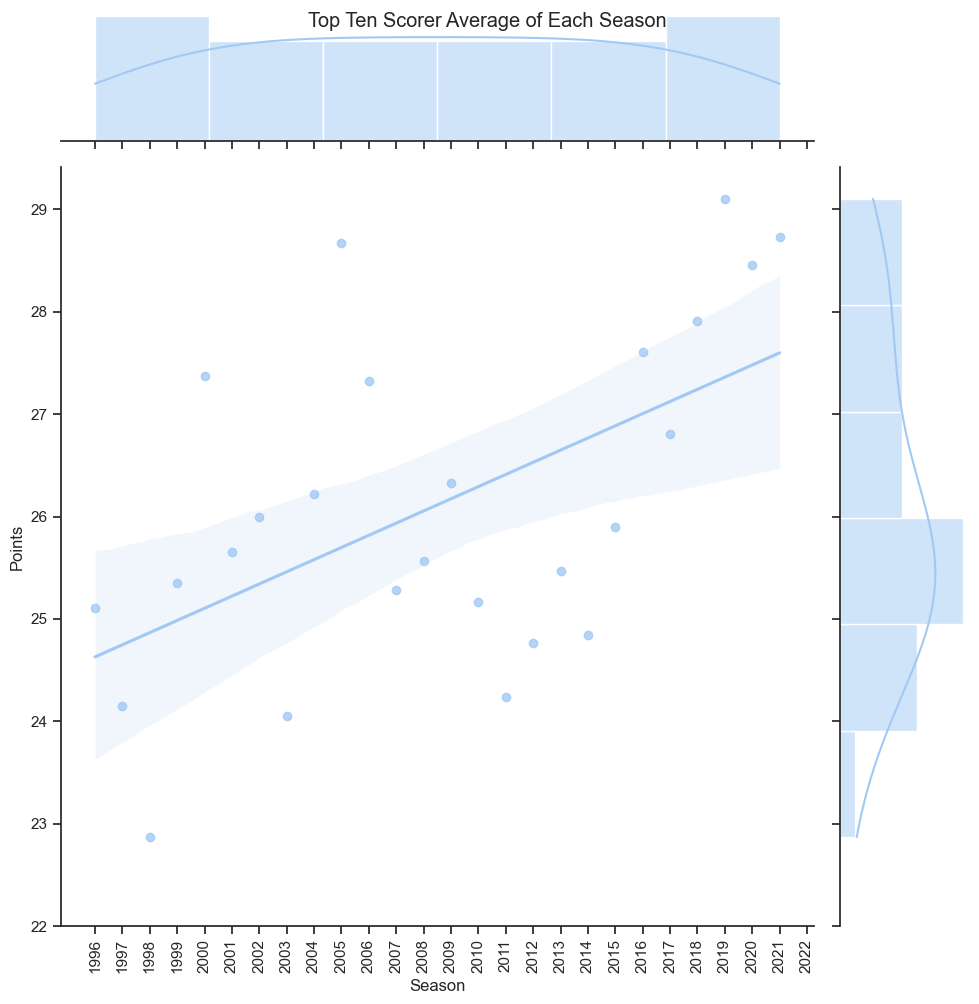

In [37]:
dfs['year'] = dfs['season'].str[:4].astype(int)
g = sns.jointplot(x='year', y='pts', kind='reg', data=dfs, height =10)
g.set_axis_labels('Season', 'Points')
g.fig.suptitle('Top Ten Scorer Average of Each Season')
plt.xticks(range(1996, 2023), rotation=90)
plt.yticks(range(22, 30))
plt.show()

g.savefig("graph3")


### Summmary 
This is a a jointplot graph with the x value being the seasons while y value being the average of the top ten best scorers average of each season. The main area is a scatter plot with a regression line so we can see what the tragectory of the plots. the side graphs are histograms of the marginal distributions. 

### Observation 

- the trajectory of the trend line it facing the top right corner of the graph indicating that as the time passes, the more average points the the player score.

- Most seasons, the average point fall between 25 pts and 26 pts based of the histogram graph that shows the marginal distribution



